In [64]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [65]:
df=pd.read_csv('Shopping Mall Customer Segmentation.csv')

In [66]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [67]:
df.shape

(15079, 5)

In [68]:
df.isna().sum()

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

In [69]:
df.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


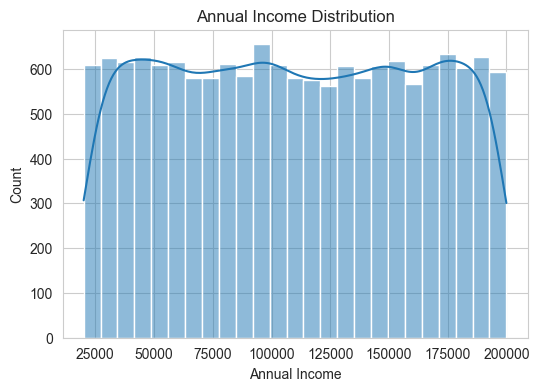

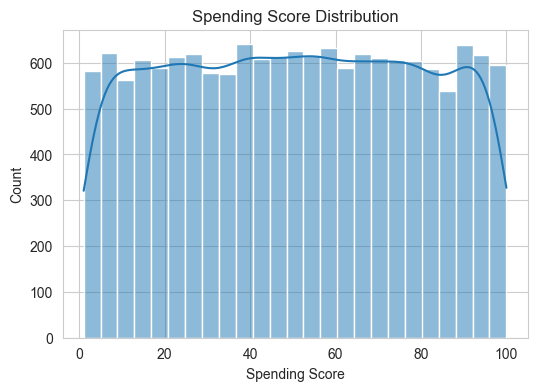

In [70]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income'], kde=True)
plt.title("Annual Income Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score'], kde=True)
plt.title("Spending Score Distribution")
plt.show()


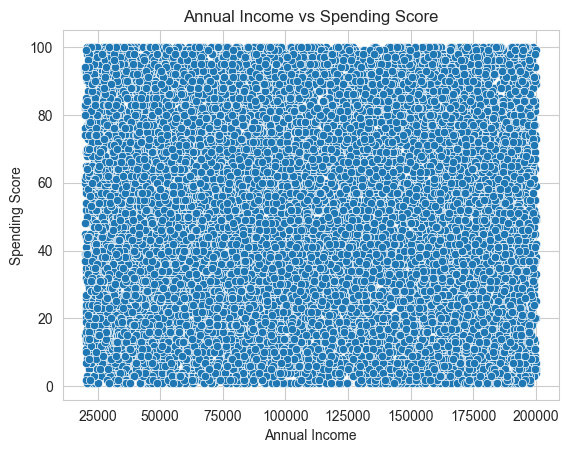

In [71]:
sns.set_style("whitegrid")
sns.scatterplot(x='Annual Income', y='Spending Score', data=df)
plt.title("Annual Income vs Spending Score") 
plt.show()

In [72]:
X = df[['Annual Income', 'Spending Score']]
print(X.head())


   Annual Income  Spending Score
0         151479              89
1         185088              95
2          70912              76
3          55460              57
4         153752              76


In [73]:
scaled=StandardScaler()
X_scaled = scaled.fit_transform(X)
print(X_scaled[:5])

[[ 0.79881267  1.33705873]
 [ 1.44207552  1.54592857]
 [-0.74320756  0.88450743]
 [-1.03895267  0.2230863 ]
 [ 0.84231698  0.88450743]]


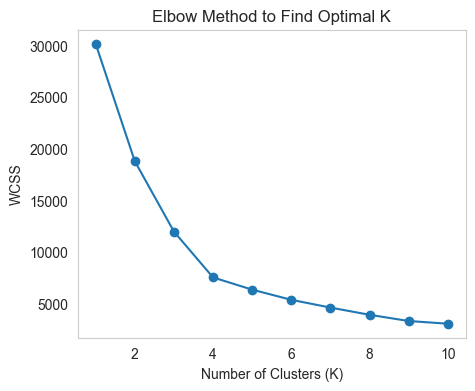

In [86]:
wcss = []  # Within Cluster Sum of Squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)   # inertia = WCSS

plt.figure(figsize=(5,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method to Find Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()


In [75]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=20, max_iter=500)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
print(df.head())


                            Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  Cluster  
0              89        1  
1              95        1  
2              76        0  
3              57        0  
4              76        1  


In [76]:
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.3905099473869008


In [77]:
centers = kmeans.cluster_centers_
print("Cluster Centers (Scaled):\n", centers)


Cluster Centers (Scaled):
 [[-0.95359266  0.96786245]
 [ 0.96757304  0.95059329]
 [-0.00389304 -0.025205  ]
 [-0.96447694 -0.97008614]
 [ 0.990335   -0.96668114]]


In [78]:
centers_original = scaled.inverse_transform(centers)
print("Cluster Centers (Original):\n", centers_original)


Cluster Centers (Original):
 [[5.99198639e+04 7.83944583e+01]
 [1.60296340e+05 7.78983841e+01]
 [1.09539478e+05 4.98675780e+01]
 [5.93511850e+04 2.27248990e+01]
 [1.61485600e+05 2.28227111e+01]]


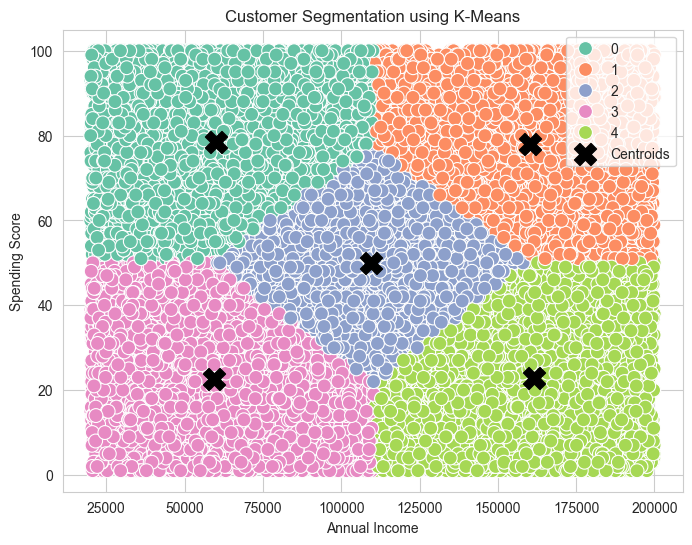

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income'],
    y=df['Spending Score'],
    hue=df['Cluster'],
    palette='Set2',
    s=100
)

# Plot cluster centers
plt.scatter(
    centers_original[:,0],
    centers_original[:,1],
    c="black",
    s=250,
    marker="X",
    label="Centroids"
)

plt.title("Customer Segmentation using K-Means")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


In [80]:
cluster_summary = df.groupby("Cluster")[['Annual Income', 'Spending Score']].mean()
print(cluster_summary)


         Annual Income  Spending Score
Cluster                               
0         59894.298410       78.423761
1        160311.149782       77.890305
2        109251.604113       49.970865
3         59359.238184       22.711754
4        161391.123389       22.887242


In [81]:
cluster_percent = df['Cluster'].value_counts(normalize=True) * 100
print(cluster_percent)


Cluster
1    21.340938
3    21.327674
0    21.267989
4    20.584919
2    15.478480
Name: proportion, dtype: float64


In [85]:
def check_customer(income, spending):
    input_data = np.array([[income, spending]])
    input_scaled = scaled.transform(input_data)   # scaling is must
    cluster = kmeans.predict(input_scaled)

    print("Customer belongs to Cluster:", cluster[0])

check_customer(185088, 95)


Customer belongs to Cluster: 1


C:\Users\Dell 5490T\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
